## Df + Lib

In [1]:
%store -r merge_unique_df

In [2]:
# essential
import pandas as pd
import matplotlib.pyplot as plt

# for NN
import keras
from keras.models import Sequential
# we most use sequential model -> one layer after the other (sequence of layer)
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import MeanAbsolutePercentageError
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

# non so se siano utili
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#basics 
# essential
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# in order to obtain the True/False for each genre
onehot_enc=pd.get_dummies(merge_unique_df['maingenere'],prefix='genre')
onehot_enc.head(2)

,genre_blues,genre_country,genre_dance,genre_disco,genre_folk,genre_funk,genre_house,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [4]:
# Conversione in valori binari (0 o 1) per rappresentare il main genere con 1 e gli altri con 0
one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)

C:\Users\elped\AppData\Local\Temp\ipykernel_14252\823651478.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot_enc_binary = onehot_enc.applymap(lambda x: 1 if x else 0)


In [5]:
# we merge the 2 df
df_one_hot=pd.concat([merge_unique_df,one_hot_enc_binary],axis=1)
df_one_hot.head(2)

,Performer,Song,spotify_genre,spotify_track_duration_minute,spotify_track_explicit,spotify_track_album,danceability,energy,key,loudness,...,genre_indie,genre_jazz,genre_latin,genre_metal,genre_other,genre_pop,genre_r&b,genre_rap,genre_rock,genre_soul
SongID,,,,,,,,,,,,,,,,,,,,,
-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0
¿Dònde Està Santa Claus? (Where Is Santa Claus?)Augie Rios,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],3.43,unknown,single,0.59,0.57,5.37,-9.97,...,0,0,0,0,1,0,0,0,0,0


## U1 - Test ONE HOT

In [6]:
mask_u1=df_one_hot['User']==1
u1_onehot_df=df_one_hot[mask_u1]
u1_onehot_df.shape

(4669, 38)

### NN - test ONE HOT

In [7]:
# FIRST WE NEED TO DEFINE THE FEATURES
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

In [8]:
# DEFINITION OF TARGET AND FEATURES

x=u1_onehot_df[total_features]

y=u1_onehot_df[target]

In [9]:
# first we have to standardize
scaler=StandardScaler()
x[numerical_features]=scaler.fit_transform(x[numerical_features])

C:\Users\lovoa\AppData\Local\Temp\ipykernel_14936\3500654492.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features]=scaler.fit_transform(x[numerical_features])


In [10]:
#TRAIN/TEST
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model_onehot=Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(16,activation='relu'),
    Dense(1,activation='relu')
])

c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model_onehot.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [13]:
history_onehot=model_onehot.fit(x_train,y_train,epochs=20,batch_size=32,validation_split=0.2)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2138 - mae: 0.3616 - val_loss: 0.0594 - val_mae: 0.1815
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0443 - mae: 0.1664 - val_loss: 0.0438 - val_mae: 0.1625
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0359 - mae: 0.1527 - val_loss: 0.0389 - val_mae: 0.1550
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0334 - mae: 0.1458 - val_loss: 0.0356 - val_mae: 0.1491
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0293 - mae: 0.1379 - val_loss: 0.0348 - val_mae: 0.1467
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0285 - mae: 0.1345 - val_loss: 0.0332 - val_mae: 0.1438
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0262 - mae: 0.1293 - val_loss: 0.0316 - val_mae: 0.1411
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0245 - mae: 0.1254 - val_loss: 0.0308 - val_mae: 0.1385
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0254 - mae: 

In [14]:
loss, mae = model_onehot.evaluate(x_test, y_test)
print(f'Loss: {loss}, MAE: {mae}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0264 - mae: 0.1289
Loss: 0.027704035863280296, MAE: 0.13181419670581818


We can see that we have a small reduction in the MSE, but the MAE still remain above the 10%, so even add the information related to the maingenre with the one hot encoded technique, we still have problems in reach our goal.

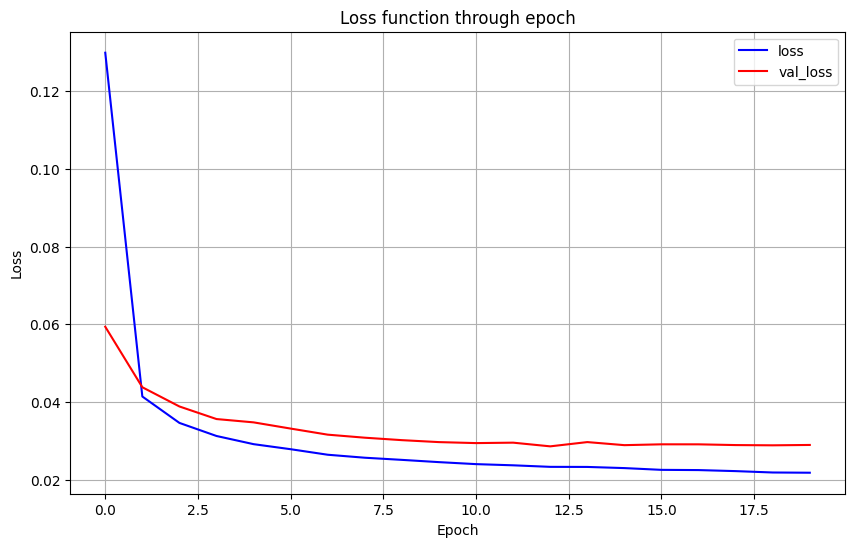

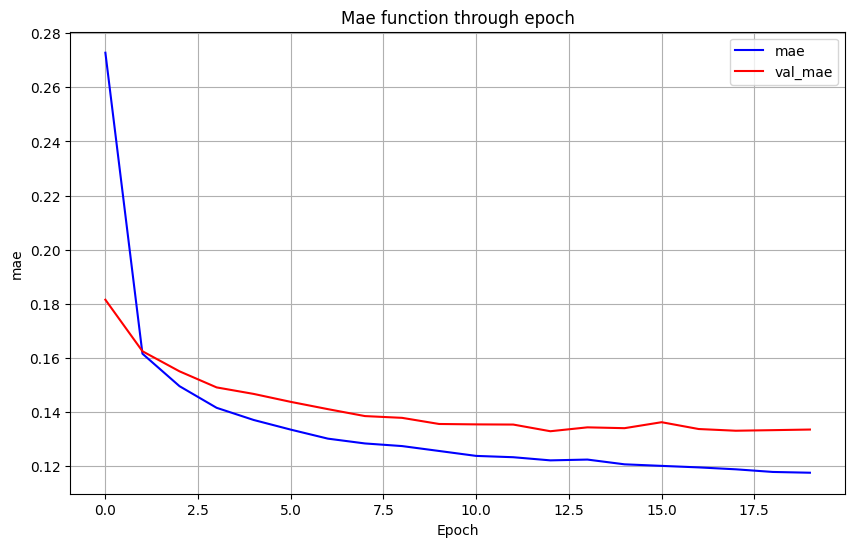

In [15]:
#SOME PLOT

#plot loss
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['loss'],color='blue',label='loss')
plt.plot(history_onehot.history['val_loss'],color='red',label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss function through epoch')
plt.legend()
plt.grid()
plt.show()

    #plot mean
plt.figure(figsize=(10,6))
plt.plot(history_onehot.history['mae'],color='blue',label='mae')
plt.plot(history_onehot.history['val_mae'],color='red',label='val_mae')
plt.xlabel('Epoch')
plt.ylabel('mae')
plt.title('Mae function through epoch')
plt.grid()
plt.legend()
plt.show()   

## GENERALIZE ONE HOT - ENCODING - all users

In [16]:
numerical_features = [
    'spotify_track_duration_minute', 'danceability', 'energy', 'loudness',
    'mode', 'speechiness', 'acousticness',
    'spotify_track_popularity', 'instrumentalness', 'liveness']

genre_features = [col for col in u1_onehot_df.columns if col.startswith('genre_')]

# UNION OF THE TWO 
total_features = numerical_features + genre_features

target='valence'

### DEFINE FUNCTIONS

## PLOTS

In [ ]:
def plot_for_model(history):

    #plot loss
    plt.figure()
    plt.plot(history.history['loss'],color='blue',label='loss')
    plt.plot(history.history['val_loss'],color='red',label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss function through epoch')
    plt.legend()
    plt.grid()
    plt.show()

    #plot mean
    plt.figure()
    plt.plot(history.history['mae'],color='blue',label='mae')
    plt.plot(history.history['val_mae'],color='red',label='val_mae')
    plt.xlabel('Epoch')
    plt.ylabel('mae')
    plt.title('Mae function through epoch')
    plt.grid()
    plt.legend()
    plt.show()   

    # plot 
    # aggiunto A.L
    #plt.figure(figsize=(12,6))
    #plt.plot(y_test, color='r')
    #plt.plot(y_hat, color='b') #attenzione alcune predizione sono negative
    #plt.title('Prediction')
    #plt.legend()
    #plt.show()

## SPLIT DATA

In [18]:
def return_train_test(df):
    #extract the feature and target
    x = df[total_features]
    y = df[target]

    #normalization
    #x_scaled = scaler.fit_transform(x[numerical_features])
    #x[total_features] = scaler.fit_transform(x[numerical_features])
    x[numerical_features] = scaler.fit_transform(x[numerical_features])
    #display(x)

    #split; serve farlo? non se ne occupa il fit? chiedere
    #x_train,x_test,y_train,y_test=train_test_split(x_scaled, y, test_size=0.2, random_state=42)
    x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=42)
    #display(x_train)

    return x_train,x_test,y_train,y_test

## MODEL

In [19]:
# function to create the model
def create_model_user(shape_x_train): #number of columns -> shape
    
    
    '''model_user_i = Sequential([
        Dense(32, input_dim=shape_x_train, activation='relu', name='first_layer'),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        

        Dense(16, activation='relu', name='secod_layer'),
        Dense(1, activation='linear', name='final_layer')
    ])'''

    model_user_i = Sequential([
        
        Dense(32,input_dim=shape_x_train,activation='relu',name='first_layer',kernel_regularizer=l2(0.01)),
        # 64 as the number of initial layer is a common choice when we build a NN --> VEDIAMO COME FUNZIA POI NEL CASO SI SISTEMA IN SEGUITO
        # input_dim: take the dimension of the x_train array --> that is equivalent to the number of feature in input
        
        # SI POSSONO AGGIUNGERE PER OGNI LAYER --> Dropout(0.3) per evitare overfitting
        Dropout(0.3),
        Dense(16,activation='relu',name='secod_layer',kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        #Dense(1,activation='linear',name='final_layer')
        Dense(1,activation='sigmoid',name='final_layer') #ATENZION PROVIAMO SIGMOID PRCHè CI SERVE UN OUTPUT NEL RANGE DI O E 1
    
    ])

    #compile the model
    model_user_i.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

    #summary
    #display(model_user_i.summary())

    #return  the model
    return model_user_i


## FIT MODEL

In [20]:
#function to train the model
def fit_model(model, x_train, y_train, x_test, y_test):

    history_model = model.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=100,
        batch_size=32,
        #verbose=1
    )

    return history_model

## RECOMANDATION FUNCTION + CONFUSION MATRIX

In [21]:
def reco_function_conf_matrix(y_test, y_hat, threshold):
    
    #initialize dataframe    
    data = {'Original Test': y_test,
        'Prediction Test': y_hat.flatten(),
        }
    df_prediction = pd.DataFrame(data = data)
    df_prediction['Original over Thrashold'] = df_prediction['Original Test'] > threshold
    df_prediction['Predicted over Thrashold'] = df_prediction['Prediction Test'] > threshold
    display(df_prediction)

    #plot confusion matrix of reccomandation
    cm = confusion_matrix(df_prediction['Original over Thrashold'], df_prediction['Predicted over Thrashold'])
    
    # METRIX FOR EVALUATE RECCOMANDATION 
    # Extract TP, TN, FP, FN
    TN, FP, FN, TP = cm.ravel()
    # Calculate metrics manually
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['True', 'False'], yticklabels=['True', 'False'])
    plt.title('Confiusion matrix')
    plt.xlabel('predicted')
    plt.ylabel('actual')
    plt.show()

    # Store metrics in a DataFrame
    df_metrics_cm = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
        'Value': [accuracy, precision, recall, f1]
    })

    display(df_metrics_cm.round(2))

    return df_prediction,df_metrics_cm

## MAIN 

---------------------------------------------------------
USER 0
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_14936\3823668386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4636 - mae: 0.2252 - val_loss: 0.1920 - val_mae: 0.1726
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1567 - mae: 0.1764 - val_loss: 0.0768 - val_mae: 0.1580
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0688 - mae: 0.1611 - val_loss: 0.0472 - val_mae: 0.1513
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0488 - mae: 0.1592 - val_loss: 0.0401 - val_mae: 0.1477
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0429 - mae: 0.1534 - val_loss: 0.0382 - val_mae: 0.1454
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0405 - mae: 0.1513 - val_loss: 0.0377 - val_mae: 0.1447
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0396 - mae: 0.1500 - val_loss: 0.0374 - val_mae: 0.1457
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0407 - mae: 0.1531 - val_loss: 0.0368 - val_mae: 0.1444
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

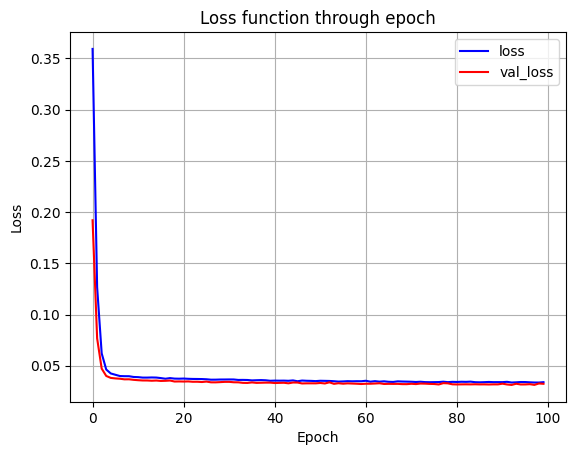

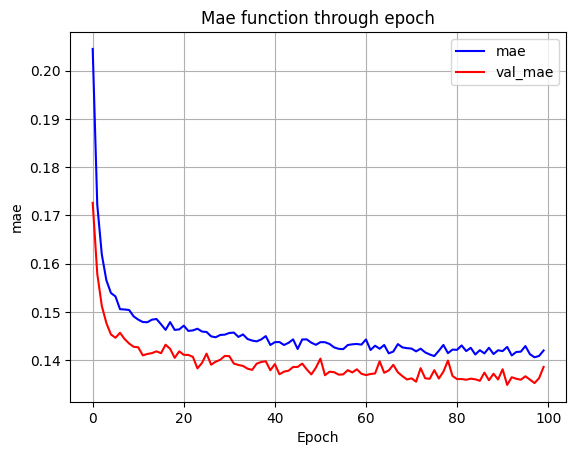

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0330 - mae: 0.1372 
MSE:  0.0324028879404068
MAE: 0.138647198677063


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Nice 'N' NaastyThe Salsoul Orchestra,0.883,0.747379,True,True
ShiffteeOnyx,0.253,0.661524,False,False
Since I Made You CryThe Rivieras,0.569,0.505906,False,False
TonightNew Kids On The Block,0.383,0.389127,False,False
Never Comes The DayThe Moody Blues,0.180,0.334858,False,False
...,...,...,...,...
What Am I Living ForChuck Willis,0.682,0.613396,False,False
All Summer LongHit Masters,0.863,0.652743,True,False
Hey Daddy (Daddy's Home)Usher Featuring Plies,0.352,0.473415,False,False


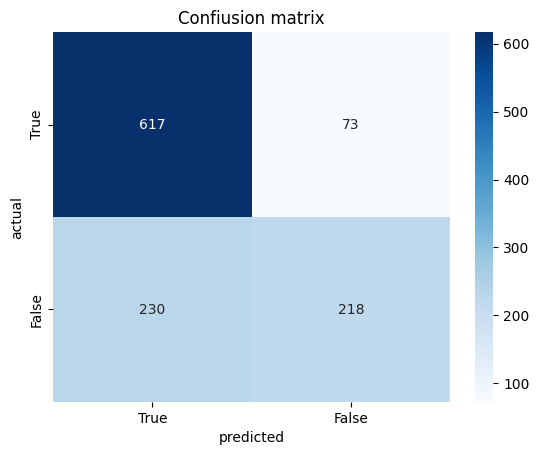

,Metric,Value
0,Accuracy,0.73
1,Precision,0.75
2,Recall,0.49
3,F1-score,0.59


---------------------------------------------------------
USER 1
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_14936\3823668386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4751 - mae: 0.2154 - val_loss: 0.2362 - val_mae: 0.1835
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1985 - mae: 0.1889 - val_loss: 0.1056 - val_mae: 0.1633
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0952 - mae: 0.1718 - val_loss: 0.0607 - val_mae: 0.1542
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0603 - mae: 0.1631 - val_loss: 0.0469 - val_mae: 0.1495
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0481 - mae: 0.1555 - val_loss: 0.0430 - val_mae: 0.1493
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0453 - mae: 0.1564 - val_loss: 0.0409 - val_mae: 0.1458
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0420 - mae: 0.1504 - val_loss: 0.0398 - val_mae: 0.1446
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0430 - mae: 0.1542 - val_loss: 0.0396 - val_mae: 0.1447
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

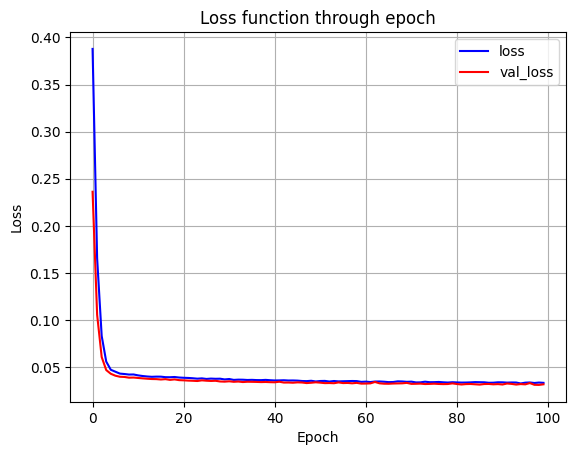

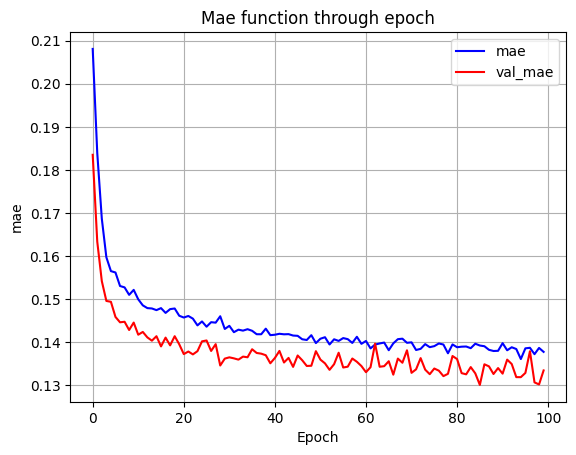

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0309 - mae: 0.1306 
MSE:  0.03176940605044365
MAE: 0.13339069485664368


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
One Night AffairThe O'Jays,0.876,0.785250,True,True
Young & Gettin' ItMeek Mill Featuring Kirko Bangz,0.858,0.487032,True,False
Everything Is Good About YouThe Lettermen,0.804,0.790630,True,True
Hot Fun In The SummertimeSly & The Family Stone,0.931,0.838610,True,True
Will The Wolf SurviveLos Lobos,0.844,0.800438,True,True
...,...,...,...,...
HeavenBryan Adams,0.335,0.360043,False,False
I Have NothingWhitney Houston,0.240,0.352834,False,False
Only You Can Love Me This WayKeith Urban,0.325,0.392757,False,False


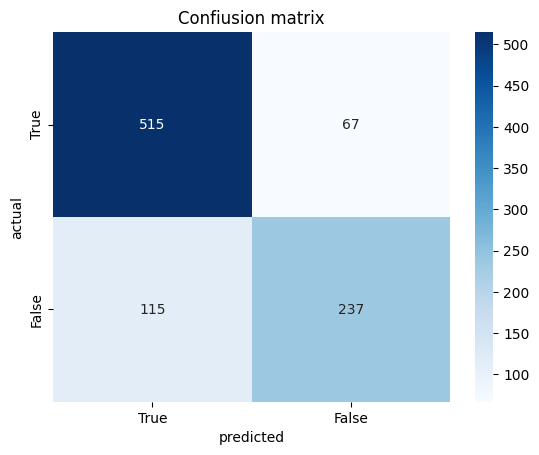

,Metric,Value
0,Accuracy,0.81
1,Precision,0.78
2,Recall,0.67
3,F1-score,0.72


---------------------------------------------------------
USER 2
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_14936\3823668386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


270/270 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3696 - mae: 0.1655 - val_loss: 0.0766 - val_mae: 0.1254
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0584 - mae: 0.1256 - val_loss: 0.0325 - val_mae: 0.1126
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0329 - mae: 0.1190 - val_loss: 0.0292 - val_mae: 0.1107
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0308 - mae: 0.1172 - val_loss: 0.0280 - val_mae: 0.1082
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0301 - mae: 0.1166 - val_loss: 0.0274 - val_mae: 0.1070
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0287 - mae: 0.1134 - val_loss: 0.0268 - val_mae: 0.1049
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0295 - mae: 0.1154 - val_loss: 0.0266 - val_mae: 0.1058
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0282 - mae: 0.1128 - val_loss: 0.0261 - val_mae: 0.1024
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss:

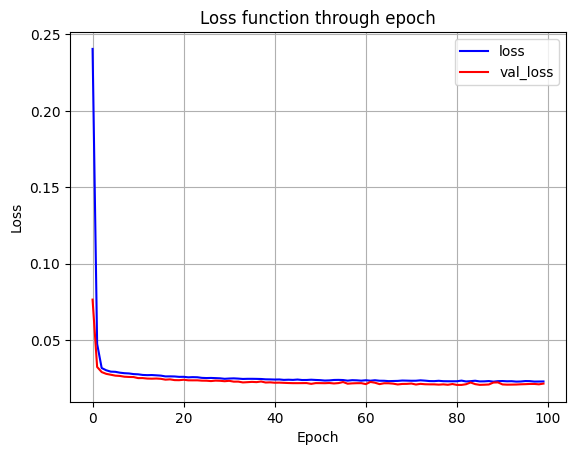

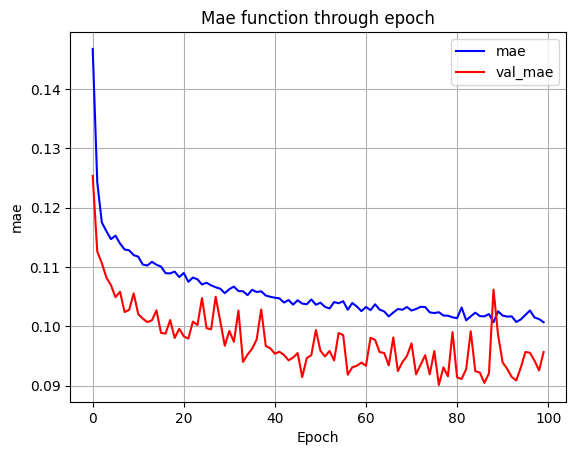

68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0219 - mae: 0.0959
MSE:  0.021650442853569984
MAE: 0.09564553946256638


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
The Court RoomClarence Carter,0.690,0.714581,False,True
We Fell In Love While DancingBill Brandon,0.855,0.706756,True,True
Forever My LadyJodeci,0.771,0.689385,True,False
Isn't It Lonely TogetherRobert Knight,0.690,0.714581,False,True
Roll UpWiz Khalifa,0.602,0.488215,False,False
...,...,...,...,...
Shut UpAriana Grande,0.599,0.387701,False,False
Sugar Don't BiteSam Harris,0.975,0.860941,True,True
"Oh, How I Miss You TonightJeanne Black",0.110,0.340437,False,False


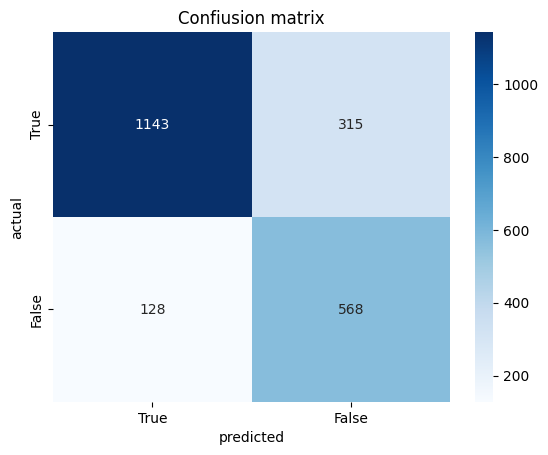

,Metric,Value
0,Accuracy,0.79
1,Precision,0.64
2,Recall,0.82
3,F1-score,0.72


---------------------------------------------------------
USER 3
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_14936\3823668386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5022 - mae: 0.2101 - val_loss: 0.2957 - val_mae: 0.1939
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2529 - mae: 0.1892 - val_loss: 0.1554 - val_mae: 0.1872
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1345 - mae: 0.1820 - val_loss: 0.0894 - val_mae: 0.1769
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0793 - mae: 0.1695 - val_loss: 0.0599 - val_mae: 0.1647
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0548 - mae: 0.1577 - val_loss: 0.0472 - val_mae: 0.1545
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0470 - mae: 0.1554 - val_loss: 0.0424 - val_mae: 0.1513
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0427 - mae: 0.1505 - val_loss: 0.0403 - val_mae: 0.1493
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0426 - mae: 0.1532 - val_loss: 0.0395 - val_mae: 0.1484
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0428 - mae: 0.1

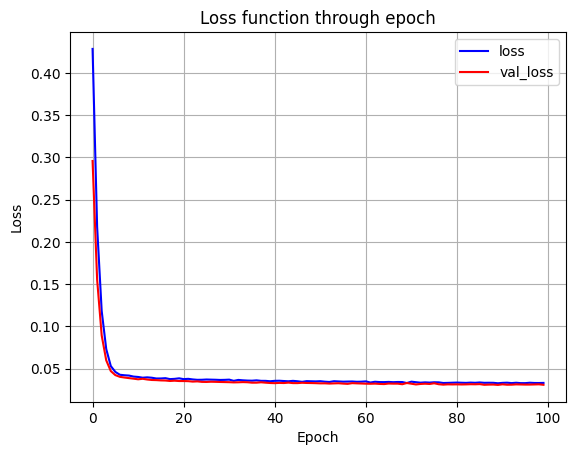

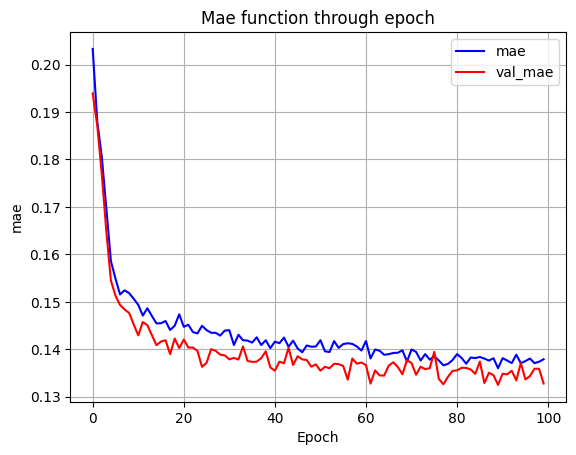

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0327 - mae: 0.1382 
MSE:  0.030920973047614098
MAE: 0.1327834278345108


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
Can't Let You Out Of My SightChuck Jackson & Maxine Brown,0.4530,0.784554,False,True
It's All Coming Back To Me NowCeline Dion,0.2860,0.275053,False,False
Birthday CakeRihanna Featuring Chris Brown,0.3290,0.784862,False,True
Jack The RipperLink Wray And The Wraymen,0.2920,0.477917,False,False
Little StarThe Elegants,0.6970,0.434628,False,False
...,...,...,...,...
Who Needs PicturesBrad Paisley,0.1520,0.382078,False,False
TwoLil Uzi Vert,0.0371,0.329481,False,False
Hands OnKanye West Featuring Fred Hammond,0.5980,0.428620,False,False


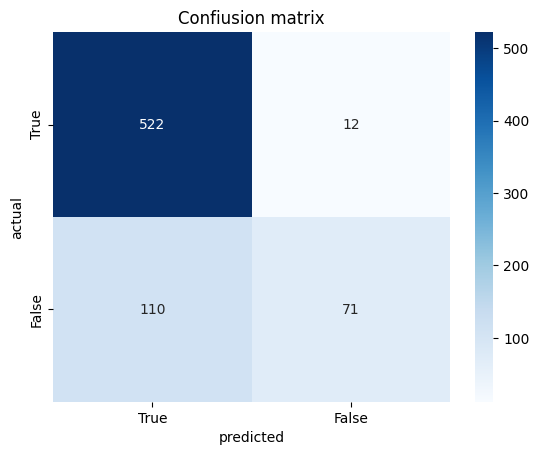

,Metric,Value
0,Accuracy,0.83
1,Precision,0.86
2,Recall,0.39
3,F1-score,0.54


---------------------------------------------------------
USER 4
Epoch 1/100


C:\Users\lovoa\AppData\Local\Temp\ipykernel_14936\3823668386.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[numerical_features] = scaler.fit_transform(x[numerical_features])
c:\Users\lovoa\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.5152 - mae: 0.2142 - val_loss: 0.3511 - val_mae: 0.1916
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3153 - mae: 0.1881 - val_loss: 0.2192 - val_mae: 0.1827
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1979 - mae: 0.1783 - val_loss: 0.1408 - val_mae: 0.1760
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1284 - mae: 0.1736 - val_loss: 0.0953 - val_mae: 0.1702
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0897 - mae: 0.1682 - val_loss: 0.0699 - val_mae: 0.1661
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0672 - mae: 0.1627 - val_loss: 0.0563 - val_mae: 0.1621
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0536 - mae: 0.1564 - val_loss: 0.0487 - val_mae: 0.1588
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0484 - mae: 0.1559 - val_loss: 0.0449 - val_mae: 0.1569
Epoch 9/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0450 - mae: 0.1

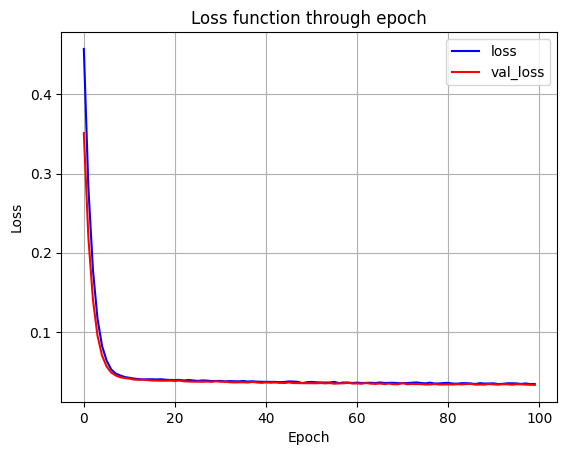

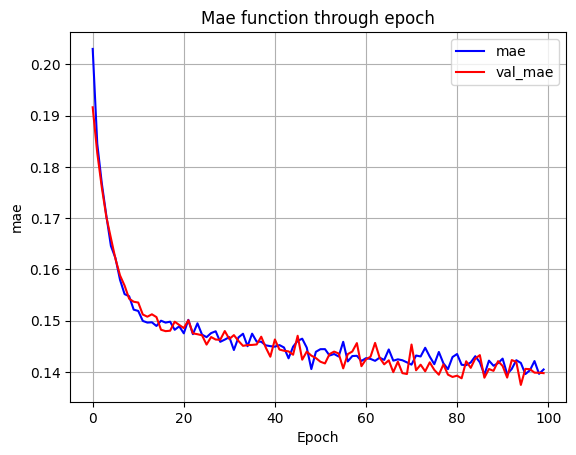

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0340 - mae: 0.1429
MSE:  0.03296373412013054
MAE: 0.13978230953216553


,Original Test,Prediction Test,Original over Thrashold,Predicted over Thrashold
SongID,,,,
DespacitoLuis Fonsi & Daddy Yankee Featuring Justin Bieber,0.816,0.661602,True,False
Wish You Were HereAvril Lavigne,0.340,0.575344,False,False
Wichita LinemanGlen Campbell,0.391,0.352321,False,False
PinkAerosmith,0.777,0.511466,True,False
Go Hard Or Go HomeWiz Khalifa & Iggy Azalea,0.386,0.554386,False,False
...,...,...,...,...
Pull Up N WreckBig Sean & Metro Boomin Featuring 21 Savage,0.091,0.367526,False,False
Empire State Of MindGlee Cast,0.719,0.576655,True,False
Impossible Mission (Mission Impossible)Soul Survivors,0.786,0.693561,True,False


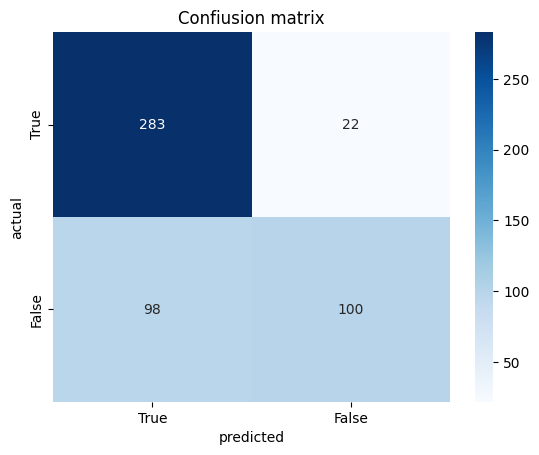

,Metric,Value
0,Accuracy,0.76
1,Precision,0.82
2,Recall,0.51
3,F1-score,0.62


In [22]:
dizio_model_user = {} #in this dizio we store the model for each user
dizio_accuracy = {} #accuracy of the model

# DICTIONARY TO STORE SONG RECOMMENDATION PER USER
reccomandations_songs_per_user={}

#threshold
threshold = 0.7

#loop creation user and model
for i in range(0, len(df_one_hot['User'].unique())): #i indica lo user   
#for i in range (0,1):
    print('---------------------------------------------------------')
    print(f'USER {i}')

    #select user
    mask_user = df_one_hot['User'] == i
    #display(mask_user)
    user_i_df = df_one_hot[mask_user]
    #display(user_i_df) 

    #return train and test
    x_train,x_test,y_train,y_test = return_train_test(user_i_df)

    #creation model for the specific user
    model_user_i = create_model_user(x_train.shape[1])
    
    #fit the model with the different x, y train (for different user)
    history_model_user_i = fit_model(model_user_i, x_train, y_train, x_test, y_test)

    #test no function
    '''history_model_user_i = model_user_i.fit(
        x_train,y_train,
        #validation_split=0.2,
        validation_data = [x_test, y_test],
        epochs=30,
        batch_size=32,
        #verbose=1
    )'''

    #prediction
    y_hat = model_user_i.predict(x_test)

    #plot the metrics of the model
    plot_for_model(history_model_user_i, y_hat, x_test)

    #accuracy
    test_loss, test_mae = model_user_i.evaluate(x_test,y_test,verbose=1)
    print('MSE: ', test_loss)
    print('MAE:', test_mae)

    #reccomandation
    reccomandation_df = reco_function_conf_matrix(y_test, y_hat, threshold)

    #save the model in the dictionary
    #add also the raccomandations
    dizio_model_user[f"User{i}"] = {'model_user_i' : model_user_i,
                                    'history_model_user_i': history_model_user_i,
                                    'x_train': x_train,
                                    'x_test': x_test,
                                    'y_train': y_train,
                                    'y_test': y_test,
                                    'y_hat': y_hat,
                                    'recommendations:': reccomandation_df} 
    #save accuracy 
    dizio_accuracy[f'User{i}'] = {
        'MAE' : mean_absolute_error(y_test, y_hat),
        'MSE' : mean_squared_error(y_test, y_hat)
    }

# DISPLAY DICTIONARY ACCURACY

In [23]:
display(dizio_accuracy)

{'User0': {'MAE': 0.13864719701873396, 'MSE': 0.029108827281752472},
 'User1': {'MAE': 0.13339068970991663, 'MSE': 0.027752720159638387},
 'User2': {'MAE': 0.09564555055760851, 'MSE': 0.018915532489847578},
 'User3': {'MAE': 0.13278344333378583, 'MSE': 0.026738914222400125},
 'User4': {'MAE': 0.13978230820953488, 'MSE': 0.028651767108299392}}

A "good" MAE value depends on the context, but in general:  

- **MAE < 0.05** → Excellent model (average error of 5%).  
- **MAE between 0.05 and 0.1** → Good model.  
- **MAE between 0.1 and 0.2** → Acceptable but improvable.  
- **MAE > 0.2** → Low-precision model.  

Our MAE is around **0.1**, it means that, on average, the model is off by **10 percentage points** on the 0-1 rating scale, which might be acceptable in many scenarios.

-----------------------------------------------------------------------------------------------------------------------

***WHY IS THIS MARGIN OF ERROR ACCETABLE ?***

We must consider the nature of the data on which our model is trained.
Since, to determine our users we used an unsupervised algorithm (**kmeans**), with shilhuette 0.49, this means as explained before, that we do not have good homogeneity within the cluster.

So rightly our NN trained on this data will not capture such representative relationships, given that the user himself, as he has been defined, **does not have clear musical tastes**.

**In order to have better results we will have user that lister only particular generes, this allowed us to decrease the errror since we will find a precise patterns in the data.**

## CONCLUSION

First of all we want to point out that several attempts have been made to add layers to make the network deeper, we have also tried to increase the number of neurons and modified the drop out neurons and regularization techniques within the neuron itself to avoid overfitting.

Despite these attempts to reduce the MAE below the 10% threshold, this does not appear to be possible.
Our explanation in this regard can be traced back to the nature and quantity of the data.

It would therefore be useful to test our network with different data, in particular **users with homogeneous tastes**, this allowed us to easy find **'evident patterns'**, that will improve our prediction.


**Aggiungere qualcosa anche relativamente ai risultati che otteniamo dal confusion matrix e quindi dal nostro sistema di raccomandazione, e come la composizione dei diversi utenti influenzano la bonta del reccomandation sysyem**

# DISPLAY DICTIONARY MODEL

In [24]:
#display(dizio_model_user)

# SAVE

#DA COMPLETARE

In [6]:
%store df_one_hot

Stored 'df_one_hot' (DataFrame)
